# Salary Prediction

This is a simple linear regression predictive model that optimizes salary prediction based on experience. The main aim is to understand the correlation between years of experience and salary.

### Dataset - Kaggle:  https://www.kaggle.com/code/lakyierealice/simple-linear-regression/input?scriptVersionId=120332371&select=Salary_dataset.csv

In [21]:
# import libraries

import warnings
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from plotnine import ggplot, aes, geom_bar, theme_minimal, labs
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data

# reading data using pandas
data = pd.read_csv("C:/Users/ual-laptop/Documents/GitHub/Data-Science-Project-Salary-Prediction/Salary_dataset.csv")

# display data
data.head(10)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [3]:
data.describe() # descriptive statistics

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [9]:
# Check for NA values
data[data.columns].isnull().sum()

Unnamed: 0          0
YearsExperience     0
Salary              0
Experience_Group    0
dtype: int64

No missing values found.

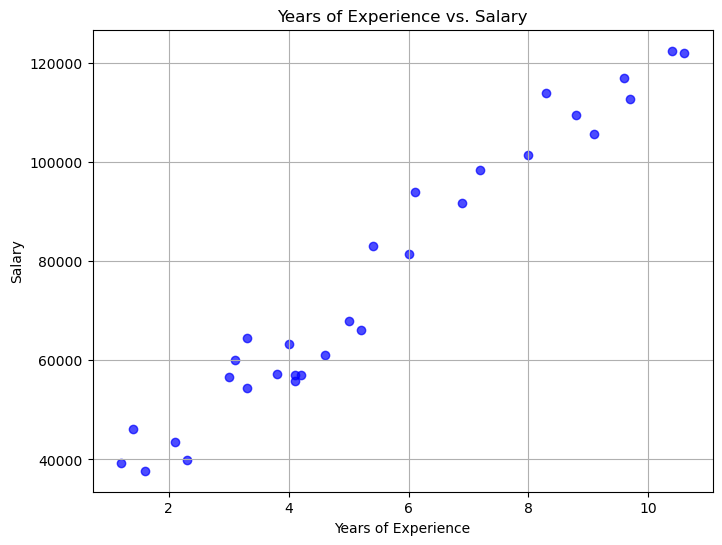

In [5]:
# Visualize the data

# Create a scatter plot
plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size
plt.scatter(data['YearsExperience'], data['Salary'], marker='o', color='b', alpha=0.7)

# Adding labels and title
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs. Salary')

# Show the plot
plt.grid(True)  # Optional: Add gridlines for better visualization
plt.show()

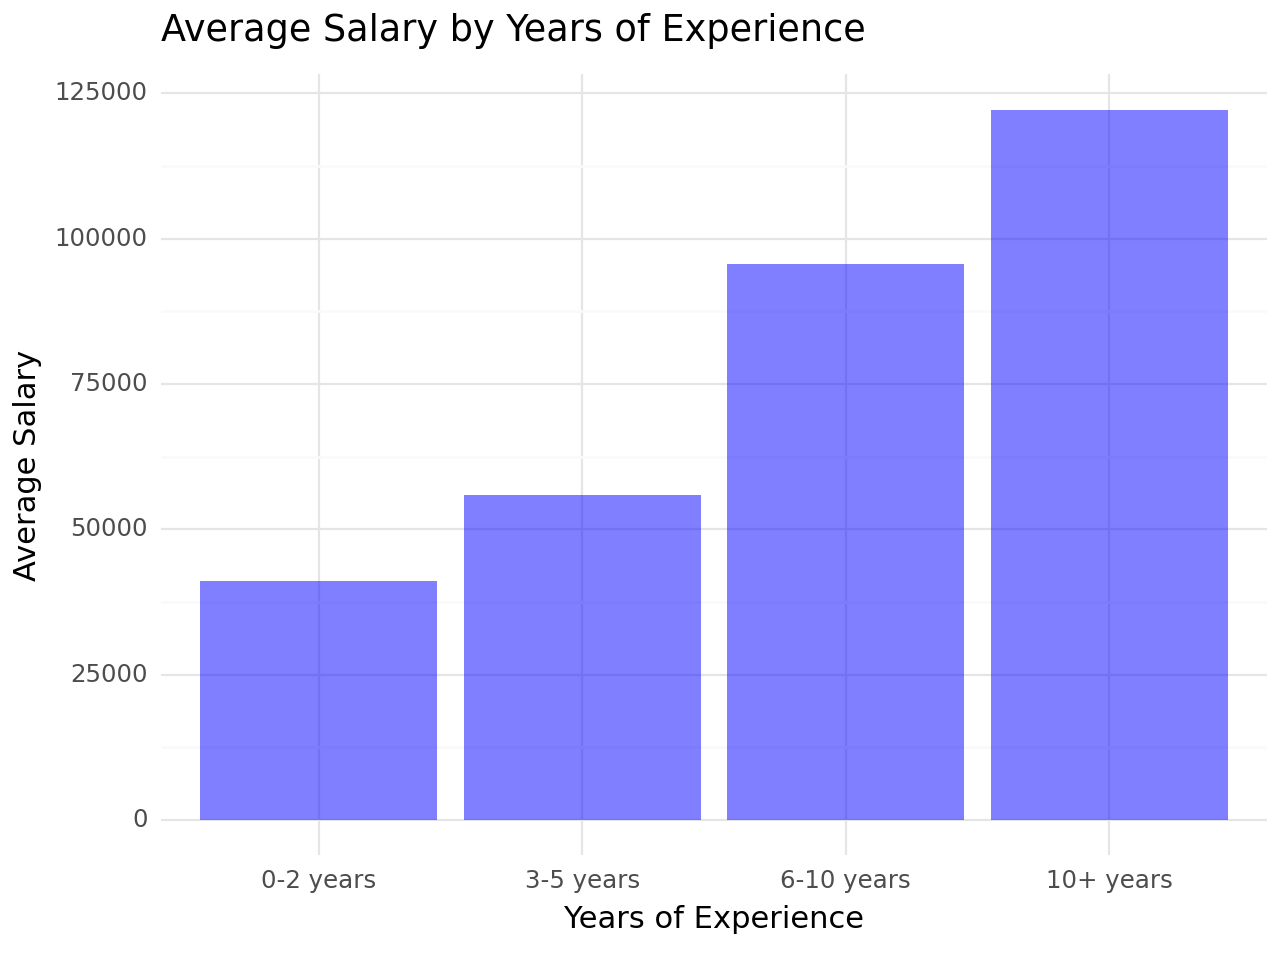

In [8]:
# Group the data into bins based on years of experience and calculate the average salary for each bin
bins = [0, 2, 5, 10, float('inf')]
labels = ['0-2 years', '3-5 years', '6-10 years', '10+ years']
data['Experience_Group'] = pd.cut(data['YearsExperience'], bins=bins, labels=labels, right=False)

average_salary_by_experience = data.groupby('Experience_Group')['Salary'].mean().reset_index()

# Create the bar plot using ggplot
plot = (
    ggplot(average_salary_by_experience, aes(x='Experience_Group', y='Salary')) +
    geom_bar(stat='identity', fill='blue', alpha=0.5) +
    theme_minimal() +
    labs(x='Years of Experience', y='Average Salary', title='Average Salary by Years of Experience')
)

print(plot)



### Split the Dataset

In [13]:
# Splitting the data into training, validation, and testing sets
# 80% training data and 20% testing data

X_train, X_test, y_train, y_test = train_test_split(data['YearsExperience'], data['Salary'], test_size= 0.2, random_state= 42)

## Data Modeling

### Simple Linear Regression 

In [20]:
reg_model = LinearRegression()
reg_model.fit(X_train.values.reshape(-1, 1), y_train) # X_train reshaped into 2D array with a single feature


LinearRegression()

## Model Optimization 

We will use **Gradient Descent** as a method to optimize our model.
The goal of gradient descent is to iteratively update the parameters of a model to minimize a cost function (also known as a loss function or objective function). In the context of machine learning, the cost function measures how well the model performs on the training data. By finding the optimal parameters that minimize the cost function, the model achieves the best possible fit to the data.

The process of updating parameters with gradient descent can be described by the following formula (for a single parameter, but extends to multiple parameters):

**new_parameter = old_parameter - learning_rate * gradient**


**Note:** There are two main variants of gradient descent:

*Batch Gradient Descent*: In batch gradient descent, the entire training dataset is used to compute the gradient in each iteration. It provides accurate gradients but can be computationally expensive for large datasets.

*Stochastic Gradient Descent (SGD)*: In stochastic gradient descent, only one data point (or a small batch of data points) is used to compute the gradient in each iteration. It is computationally more efficient but can result in noisy gradients.


For our model we will use SGD.


In [28]:
# Hyperparameters
learning_rate = 0.01
num_iterations = 1000


# creating a function for gradient decent

def gradient_descent(X,y,learning_rate, num_iterations):
       
    # Initialize model parameters (coefficients)
    theta0 = 0  # Intercept
    theta1 = 0  # Slope
    
    m = len(X)  # Number of data points

    # Stochastic Gradient Descent (SGD) algorithm
    for _ in range(num_iterations):
        theta0_gradient = 0
        theta1_gradient = 0
        
        for i in range(m):
            # Predict the salary using the current parametersabs
            y_pred = theta0 + theta1 * X[i]
            
            # Compute the errors (difference between predicted and actual salary)
            error = y_pred - y[i]
            
            # Update parameters using the gradient
            theta0 -= learning_rate * error
            theta1 -= learning_rate * error * X[i]
            
            
        # Update parameters using the gradients
        theta0 -= (learning_rate / m) * theta0_gradient
        theta1 -= (learning_rate / m) * theta1_gradient
        
    return theta0, theta1  


In [30]:
# Call the gradient descent function
theta0, theta1 = gradient_descent(X_train, y_train, learning_rate, num_iterations)

# Print the final model parameters
print("Intercept (theta0):", theta0)
print("Slope (theta1):", theta1)

# Plot the original data and the fitted line
plt.scatter(X, y, label='Data', color='blue')
plt.plot(X, theta0 + theta1 * X, label='Fitted Line', color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.title('Linear Regression using Gradient Descent')
plt.grid(True)
plt.show()


KeyError: 8